In [2]:
#  Import dependencies
import pandas as pd
import re


In [4]:
#Read in data
wine_df = pd.read_csv("../Resources/clean_wine_data_final.csv")
wine_df.head()

,country,description,points,price,province,region,title,variety,winery,rating_category,type,vintage
0,US,"Tart and snappy, the flavors of lime flesh and...",87,14,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,Good,White,2013
1,US,"Pineapple rind, lemon pith and orange blossom ...",87,13,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,Good,White,2013
2,US,"Much like the regular bottling from 2012, this...",87,65,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Good,Red,2012
3,France,This has great depth of flavor with its fresh ...,87,27,Alsace,Alsace,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,Good,White,2012
4,US,"Soft, supple plum envelopes an oaky structure ...",87,19,California,Napa Valley,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,Good,Red,2011


In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77931 entries, 0 to 77930
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          77931 non-null  object
 1   description      77931 non-null  object
 2   points           77931 non-null  int64 
 3   price            77931 non-null  int64 
 4   province         77931 non-null  object
 5   region           77931 non-null  object
 6   title            77931 non-null  object
 7   variety          77931 non-null  object
 8   winery           77931 non-null  object
 9   rating_category  77931 non-null  object
 10  type             77931 non-null  object
 11  vintage          77931 non-null  object
dtypes: int64(2), object(10)
memory usage: 7.1+ MB


## Create 'Vintage' Column Using Regex

In [ ]:
#Create copy of winery column for Regex string
wine_df['winery_copy'] = wine_df['winery']

In [ ]:
# Escape any special characters in winery string
wine_df['winery_copy'] = wine_df['winery_copy'].apply(lambda x : re.escape(x))

In [ ]:
# Fine sampel wineries with special character '(' and check escaping 
p = '\('
wine_df[['winery', 'winery_copy']][wine_df['winery'].str.contains(p)]

In [ ]:
# Define function that will extract the vintage/year usig regex

## Don't need >1 becasue only Multiple has 2 years and first one is the accurate one 

def extract_vintage(title,winery):
    vintage = re.findall('(?:'+ winery +'\D*)([\d+]{4})',title)
    if len(vintage) == 0: 
        return 'No Year'
    #if len(vintage) > 1: 
    #    return 'Multiple'
    else: 
        return vintage[0]

In [ ]:
# Apply extract_vintage function to create vintage column, passing title and escaped winery text
wine_df['vintage'] = wine_df.apply(lambda x: extract_vintage(x['title'], x['winery_copy']), axis=1)

In [ ]:
# Value_counts for vintage
#pd.set_option("display.max_rows", None)
counts = wine_df['vintage'].value_counts()
counts.head(15)

In [ ]:
# Ensuring no null values 
wine_df.info()

In [ ]:
#Reviewing Multiple tags
wine_df.loc[wine_df['vintage']== 'Multiple']


In [ ]:
# Checking 2 wineries with more than 1 year from Regex (65558, 73818)
wine_df.iloc[73818,:]

In [ ]:
#Review No Year for accuracy
pd.set_option('display.max_colwidth', 0)
no_year = wine_df.loc[wine_df['vintage']== 'No Year']
no_year['title'].tail(40)

In [ ]:
pd.reset_option('display.max_colwidth')

In [ ]:
no_year['type'].value_counts()

In [ ]:
wine_df = wine_df.drop(columns = 'winery_copy')
wine_df.info()

### Testing viability of creating a boolean column by key words 

In [ ]:
#Testing viability of tagging by key words 
p = 'fruity'
fruity_df = wine_df[wine_df['description'].str.contains(p)]
fruity_df.head()

In [ ]:
# Assigning column fruity based on if key word is in the description 
p = 'fruity'
wine_df['fruity'] = wine_df['description'].str.contains(p)
wine_df['fruity'].value_counts()

In [ ]:
wine_df.info()

## WordCloud

In [6]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [7]:
all_words = " ".join(t for t in wine_df.description)

In [8]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(['wine', 'flavor', 'flavors','notes', 'palate', 'finish', 'years', 'offers', 'texture', 
                  'hint', 'hints', 'drink',
                  'now','show'])


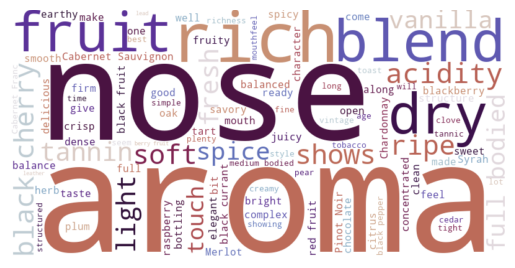

<Figure size 640x480 with 0 Axes>

In [9]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white",
                      width = 800,
                      height = 400,
                      max_words = 100, 
                      colormap= 'twilight_shifted').generate(all_words)


# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
#Save Word Cloud
wordcloud.to_file('../Flask_app/static/img/word_cloud.png')

## Visualizations

In [ ]:
import plotly.express as px

In [ ]:
wine_df['country'].value_counts()

In [ ]:
# Scatter of Canadian Wine by price and points 
fig = px.scatter(wine_df.query("country=='Canada'"), x="price", y="points",
	         size="price", color="type",
                 hover_name="title")
fig.show()

In [ ]:
by_country = wine_df.groupby('country')[['price','points']].agg('mean').round(2)
by_country = by_country.reset_index()
by_country

In [ ]:
fig2 = px.scatter(by_country, x="price", y="points",
	         size="price", hover_name = 'country', color = 'country')

fig2.show()

In [ ]:
#wine_count_country = wine_df.groupby('country')[['price']].count()
wine_count_country = wine_df.groupby('country').agg(Count = ('country', 'count'))
wine_count_country = wine_count_country.reset_index().rename(columns = {'country':'Country'})
wine_count_country

In [ ]:
colors = ['#7A2987', '#B9357D', '#E0457B', '#F77882', '#FAA094', '#FCC5B8', '#FEE5D9']


fig = px.pie(wine_count_country, values='Count', names='Country', title='Number of Wines By Country', hole = .45,
             width = 500, height = 500, color_discrete_sequence = colors)
fig.show()

In [ ]:
by_country_type = wine_df.groupby(['country','type'])[['price','points']].agg('mean').round(2).reset_index()
by_country_type
